# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sur
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kirakira
Processing Record 4 of Set 1 | dolbeau-mistassini
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | ahau
City not found. Skipping...
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | kill devil hills
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | daleville
Processing Record 13 of Set 1 | yorkton
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | yellowknife
P

In [108]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [109]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,25.44,60,0,4.32,OM,1731637688
1,adamstown,-25.0660,-130.1015,23.31,87,80,3.93,PN,1731637689
2,kirakira,-10.4544,161.9205,29.61,71,49,4.26,SB,1731637691
3,dolbeau-mistassini,48.8763,-72.2120,-2.74,68,100,2.27,CA,1731637692
4,aasiaat,68.7098,-52.8699,-16.41,99,93,4.82,GL,1731637693


In [110]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID", index=False)

In [111]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,25.44,60,0,4.32,OM,1731637688
1,adamstown,-25.0660,-130.1015,23.31,87,80,3.93,PN,1731637689
2,kirakira,-10.4544,161.9205,29.61,71,49,4.26,SB,1731637691
3,dolbeau-mistassini,48.8763,-72.2120,-2.74,68,100,2.27,CA,1731637692
4,aasiaat,68.7098,-52.8699,-16.41,99,93,4.82,GL,1731637693


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

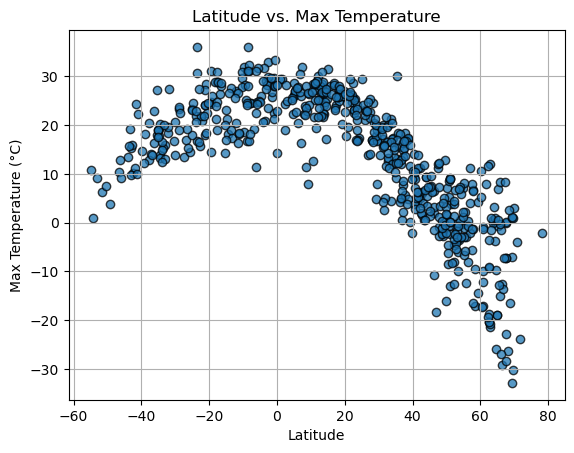

In [175]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

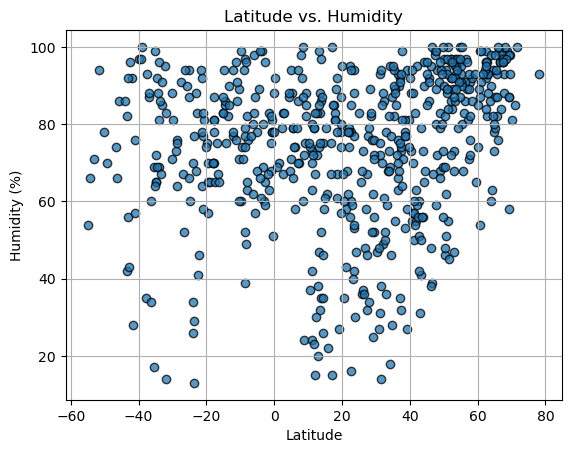

In [176]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

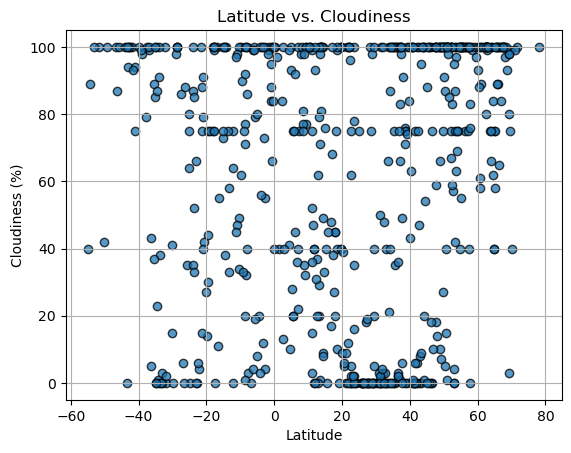

In [177]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

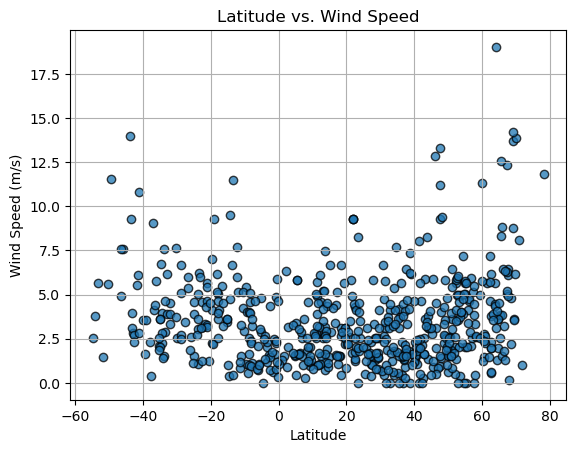

In [178]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [171]:
# Define a function to create Linear Regression plots
def linear_regression(dataframe, x_col, y_col, title, xlabel, ylabel, regression_value=0.95):
    # Extract x and y values
    x_values = dataframe['Lat']
    y_values = dataframe[y_col]
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Create regression line
    regression_line = slope * x_values + intercept

    #Formula to show in the plot
    formula_text = f'y = {slope:.2f}x + {intercept: .2f}'
    regression_value_displayed = f'R² = {r_value**2}'

    # Plot the data and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, label='Data', color='blue')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression (R² = {r_value**2:.2f})')
    plt.title(title)
    plt.figtext(0.5, regression_value, regression_value_displayed, ha='center', fontsize=12, color="black")
    plt.legend([f'{formula_text}'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,25.44,60,0,4.32,OM,1731637688
3,dolbeau-mistassini,48.8763,-72.2120,-2.74,68,100,2.27,CA,1731637692
4,aasiaat,68.7098,-52.8699,-16.41,99,93,4.82,GL,1731637693
6,jamestown,42.0970,-79.2353,5.01,95,100,4.63,US,1731637484
8,kill devil hills,36.0307,-75.6760,15.55,85,100,5.66,US,1731637604


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,adamstown,-25.0660,-130.1015,23.31,87,80,3.93,PN,1731637689
2,kirakira,-10.4544,161.9205,29.61,71,49,4.26,SB,1731637691
5,blackmans bay,-43.0167,147.3167,15.29,56,94,2.84,AU,1731637694
7,edinburgh of the seven seas,-37.0676,-12.3116,14.08,87,99,9.05,SH,1731637697
9,ushuaia,-54.8000,-68.3000,10.81,54,40,2.57,AR,1731637700


###  Temperature vs. Latitude Linear Regression Plot

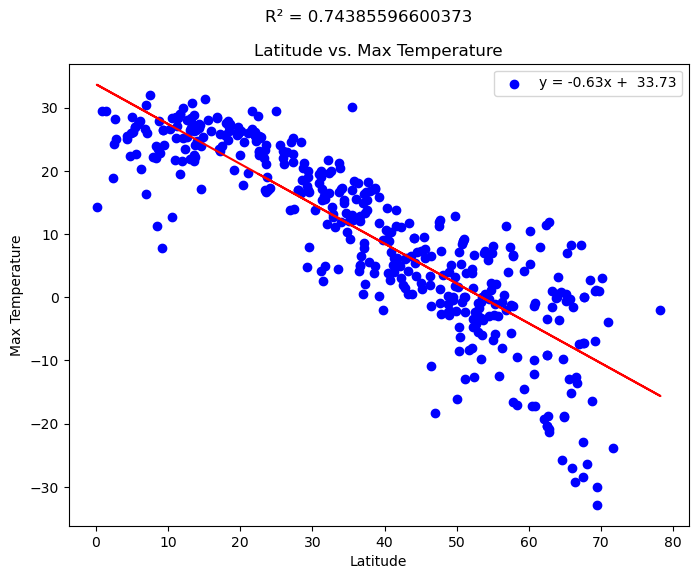

In [179]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 
                       title='Latitude vs. Max Temperature',
                       xlabel='Latitude', ylabel='Max Temperature')

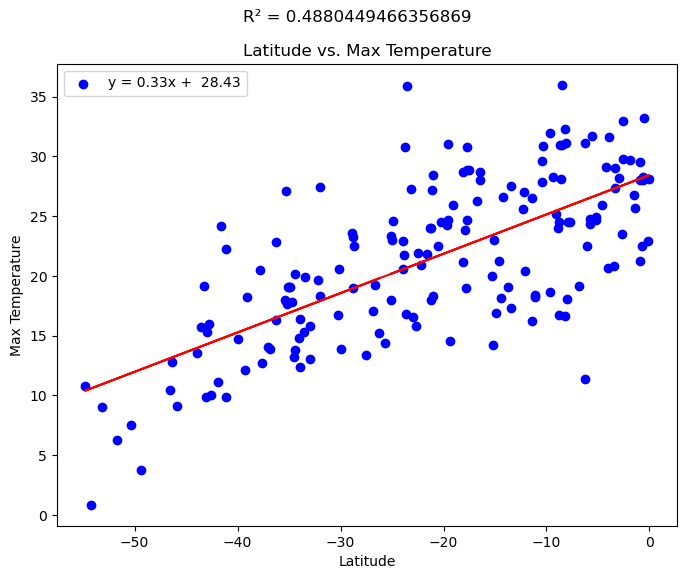

In [180]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 
                       title='Latitude vs. Max Temperature',
                       xlabel='Latitude', ylabel='Max Temperature')

**Discussion about the linear relationship:** 
The data does correlate with the geographical attributes of the regions in the scope. Northern Hemisphere regions as they move further and further away from the equator the average temperature decreases as the direct strength from the sun at the equator diminishes. The same applies for the Southern Hemisphere but as the latitude increases, evident of a positive linear regression and a negative respective to the hemispheres.

### Humidity vs. Latitude Linear Regression Plot

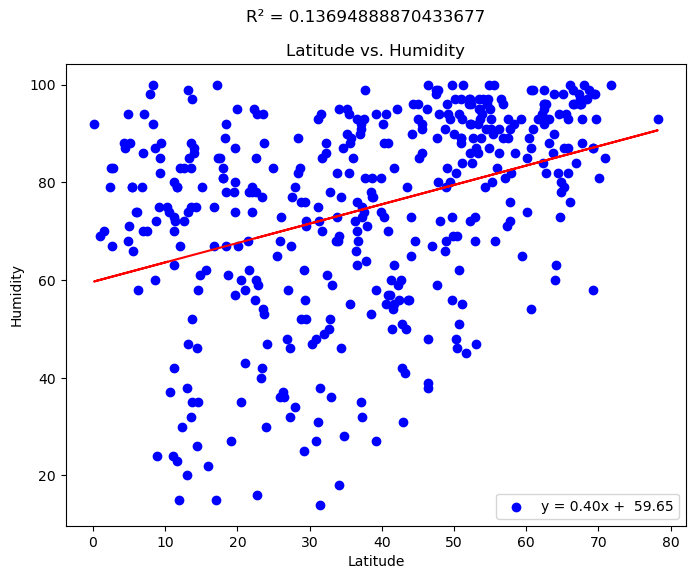

In [172]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Humidity', 
                       title='Latitude vs. Humidity',
                       xlabel='Latitude', ylabel='Humidity')

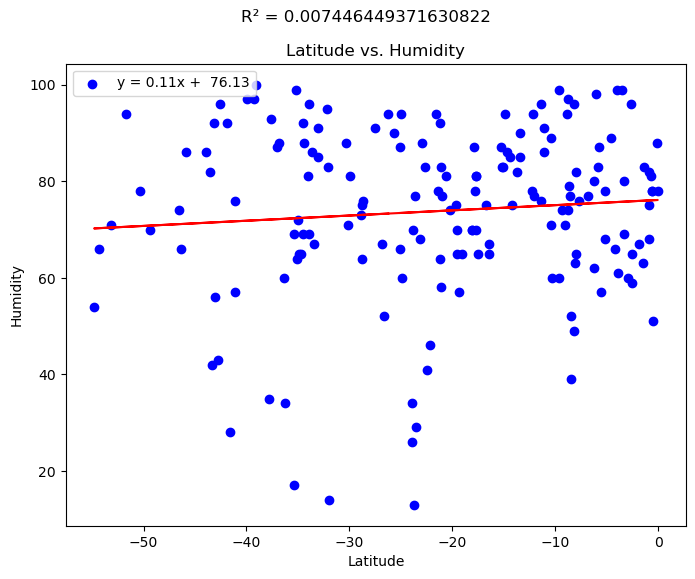

In [173]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Humidity', 
                       title='Latitude vs. Humidity',
                       xlabel='Latitude', ylabel='Humidity')

**Discussion about the linear relationship:** It is interesting to see that the humidity increases the further you go from the equator specifically in the northern hemisphere. Dependent on the cities data, one would think because there is more direct sunligth the humidity would be vastly different but I imagine that tropical regions depend on vegetation and geographical advantages such as mountains ranges to adjust the values for humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

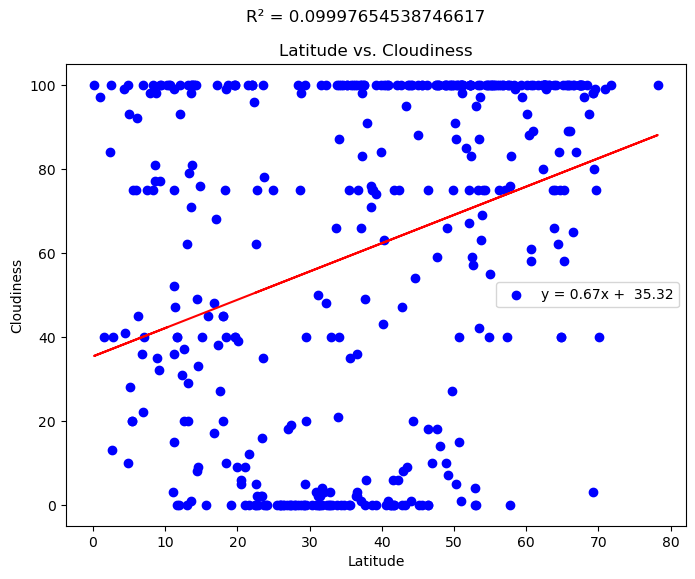

In [174]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 
                       title='Latitude vs. Cloudiness',
                       xlabel='Latitude', ylabel='Cloudiness')

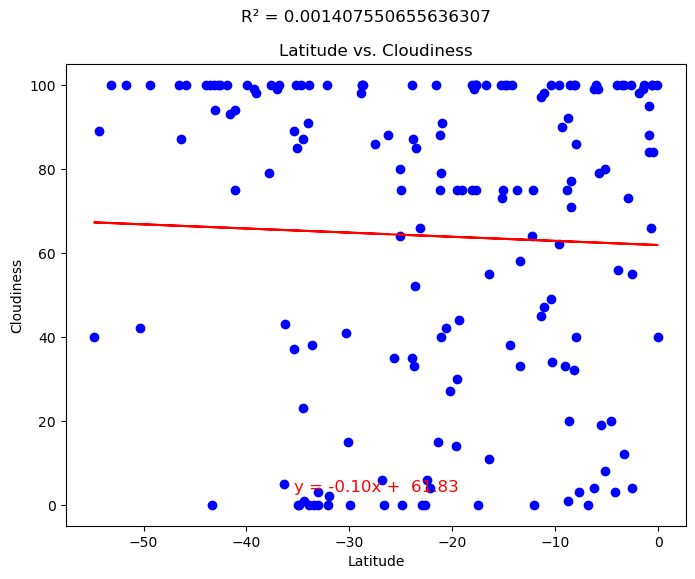

In [124]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 
                       title='Latitude vs. Cloudiness',
                       xlabel='Latitude', ylabel='Cloudiness')

**Discussion about the linear relationship:** This makes sense most of all to me as the further away from the poles you go generally means the less direct sunlight, resulting in less disruption of cloud formations. It's why many northern cities such as seattle and london are so cloudy for many parts of the year, along with the colder conditions due to the direcet lack of sunlight compared to cities near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

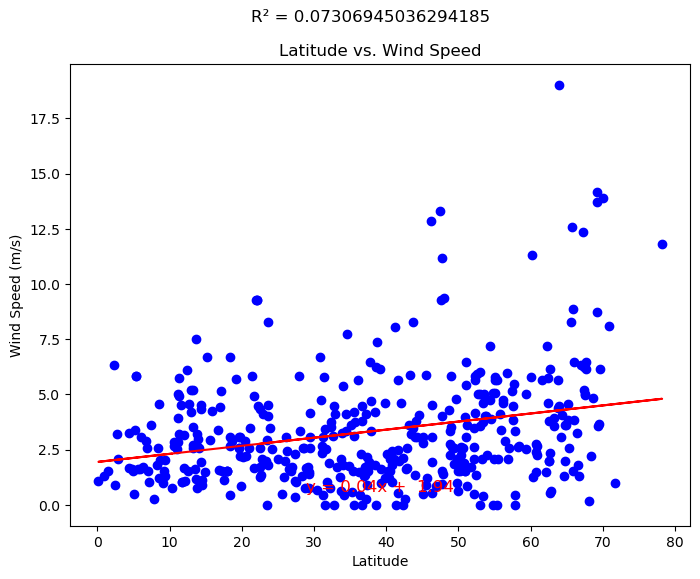

In [127]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 
                       title='Latitude vs. Wind Speed',
                       xlabel='Latitude', ylabel='Wind Speed (m/s)')

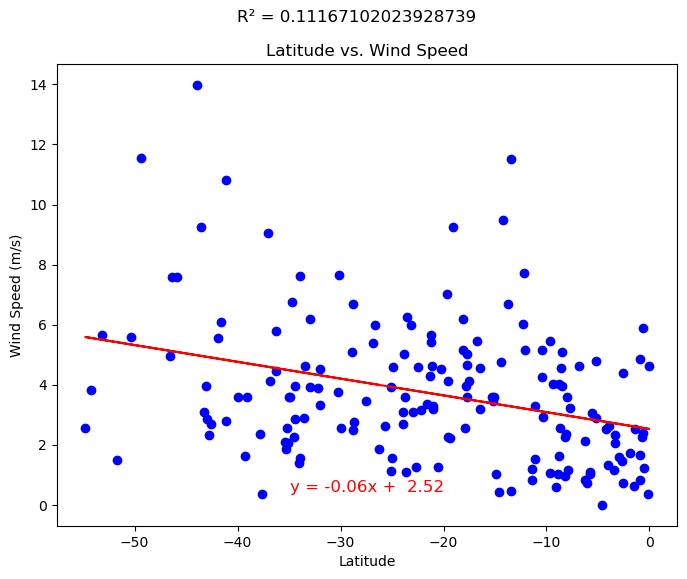

In [128]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', 
                       title='Latitude vs. Wind Speed',
                       xlabel='Latitude', ylabel='Wind Speed (m/s)')

**Discussion about the linear relationship:** Here the data seems to suggest that there is a correlation between the the wind speed and the distance you are from the equator. Generally the equator is the fastest spinning part of the globe as such the wind speed should be generally higher there than at higher latitudes, with the exception of high elevation and high altitudes. 